In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import scripts.load_dataset as load_dataset
import scripts.map_and_average as mapper
import scripts.classification as classification
import scripts.outliers as outliers

/homes/mp305/anaconda/lib/python2.7/site-packages/librosa/core/audio.py:33: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [2]:
OUTPUT_FILES = load_dataset.OUTPUT_FILES
n_iters = 10

In [5]:
df = load_dataset.sample_dataset(csv_file=load_dataset.METADATA_FILE)
df.shape

(8396, 108)

In [48]:
import pandas as pd
import os
pb_df = pd.read_csv(os.path.join('/import/c4dm-04/mariap/FeatureCsvs/PB-melodia/', '49483_SampleAudio.csv'), header=None)
print pb_df.shape
pbihist = np.loadtxt(os.path.join('/import/c4dm-04/mariap/FeatureCsvs/PB-melodia/', '49483_SampleAudio.csv'), delimiter=',')
print pbihist.shape
pb_df.head()

(45, 3600)
(45, 3600)


0         1         2         3         4         5         6         7     \
0     0  0.713115  0.523960  0.704918  0.445776  0.286885  0.426230  0.142497   
1     0  1.000000  0.495213  0.228458  0.141961  0.210300  0.063387  0.059426   
2     0  1.000000  0.495213  0.228458  0.141961  0.210300  0.063387  0.059426   
3     0  1.000000  0.495213  0.228458  0.141961  0.210300  0.063387  0.059426   
4     0  1.000000  0.495213  0.228458  0.141961  0.210300  0.063387  0.059426   

       8         9     ...       3590      3591      3592      3593      3594  \
0  0.127995  0.301387  ...   0.157629  0.194199  0.227617  0.247793  0.297604   
1  0.138329  0.075272  ...   0.132717  0.142621  0.162430  0.195774  0.252228   
2  0.138329  0.075272  ...   0.132717  0.142621  0.162430  0.195774  0.252228   
3  0.138329  0.075272  ...   0.132717  0.142621  0.162430  0.195774  0.252228   
4  0.138329  0.075272  ...   0.131066  0.139320  0.157478  0.192473  0.245626   

       3595      3596      3597      3598  3599  
0  0.278058  0.366961  0.404792  0.508197     0  
1  0.237702  0.297128  0.428854  0.530208     0  
2  0.237702  0.297128  0.428854  0.530208     0  
3  0.237702  0.297128  0.428854  0.530208     0  
4  0.234401  0.288874  0.422252  0.515352     0  

[5 rows x 3600 columns]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
Name: 0, dtype: float64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
Name: 3599, dtype: float64
0     0.713115
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     0.725167
6     0.792076
7     0.849182
8     0.848190
9     0.849824
10    0.849824
11    0.860825
12    0.854481
13    0.864482
14    0.858819
15  

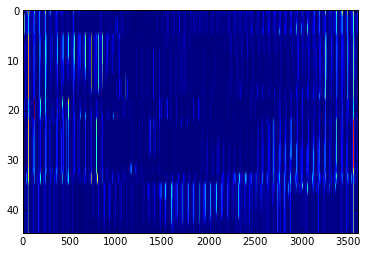

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(pb_df, aspect='auto')
print pb_df.iloc[:, 0]
print pb_df.iloc[:, -1]
print pb_df.iloc[:, 1]

In [56]:
np.argmax(pb_df.get_values(), axis=1)

array([ 59,   1,   1,   1,   1, 733, 733, 733, 733, 733, 733, 733, 733,
       733, 733,  60,  60,  60, 123, 123, 123, 182,  60,   1,   1,   1,
         1,   1,   1,   1,   1,   1,  60, 792, 792,  59,  59,  59,  59,
        59,  59,  59,  59,  59,  59])

In [8]:
df.head()

AlbumTitle  \
29182                               Music of Afghanistan   
29183                               Music of Afghanistan   
29184     Ustad Mohammad Omar: Virtuoso from Afghanistan   
29185  Music of Central Asia Vol. 3: Homayun Sakhi: T...   
29186                               Music of Afghanistan   

                                  Artist         Artist_Album  \
29182          Afghan National Orchestra      Various Artists   
29183                       Yaqub Kasimi      Various Artists   
29184  Ustad Mohammad Omar|Zakir Hussain  Ustad Mohammad Omar   
29185                      Homayun Sakhi        Homayun Sakhi   
29186                Rebab and Dhol Duet      Various Artists   

       BuyLinkTrackDownload CatalogNumber CatalogNumber_Album Collection  \
29182                 26138   FW04361_201             FW04361        NaN   
29183                 26142   FW04361_205             FW04361        NaN   
29184                 51931  SFW40439_102            SFW40439        NaN   
29185                 53229  SFW40522_101            SFW40522        NaN   
29186                 26140   FW04361_203             FW04361        NaN   

      ContentType ContentType_Album      Country  \
29182       Track             Album  Afghanistan   
29183       Track             Album  Afghanistan   
29184       Track             Album  Afghanistan   
29185       Track             Album  Afghanistan   
29186       Track             Album  Afghanistan   

                             ...                         Language_iso3  \
29182                        ...                                   NaN   
29183                        ...                                   NaN   
29184                        ...                                   pbt   
29185                        ...                                   NaN   
29186                        ...                                   NaN   

       Language_iso1      Region  Latitude  Longitude  \
29182            NaN  South Asia  33.93911  67.709953   
29183            NaN  South Asia  33.93911  67.709953   
29184  Indo-European  South Asia  33.93911  67.709953   
29185            NaN  South Asia  33.93911  67.709953   
29186            NaN  South Asia  33.93911  67.709953   

                                                   Audio  \
29182  /import/c4dm-scratch/matthiasm/data/smithsonia...   
29183  /import/c4dm-scratch/matthiasm/data/smithsonia...   
29184  /import/c4dm-scratch/matthiasm/data/smithsonia...   
29185  /import/c4dm-scratch/matthiasm/data/smithsonia...   
29186  /import/c4dm-scratch/matthiasm/data/smithsonia...   

                                                  Speech  \
29182  /import/c4dm-02/people/mariap/SpeechMusic/2613...   
29183  /import/c4dm-02/people/mariap/SpeechMusic/2614...   
29184  /import/c4dm-02/people/mariap/SpeechMusic/5193...   
29185  /import/c4dm-02/people/mariap/SpeechMusic/5322...   
29186  /import/c4dm-02/people/mariap/SpeechMusic/2614...   

                                                 Melspec  \
29182  /import/c4dm-02/people/mariap/MelSpec/26138_Sa...   
29183  /import/c4dm-02/people/mariap/MelSpec/26142_Sa...   
29184  /import/c4dm-02/people/mariap/MelSpec/51931_Sa...   
29185  /import/c4dm-02/people/mariap/MelSpec/53229_Sa...   
29186  /import/c4dm-02/people/mariap/MelSpec/26140_Sa...   

                                                  Chroma  \
29182  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   
29183  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   
29184  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   
29185  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   
29186  /import/c4dm-04/mariap/FeatureCsvs/Smoothie-py...   

                                                 Melodia  
29182  /import/c4dm-02/people/mariap/Melodia/26138_Sa...  
29183  /import/c4dm-02/people/mariap/Melodia/26142_Sa...  
29184  /import/c4dm-02/people/mariap/Melodia/51931_Sa...  
29185  /import/c4dm-02/people/mariap/Melodia/53229_Sa...

## test on a few samples

In [47]:
train, val, test = load_dataset.features_for_train_test_sets(df.iloc[:10, :], write_output=False)

file 0 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 1 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 2 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 3 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 4 of 6
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB

## now run for the whole dataset

In [59]:
for n in range(n_iters):
    print "iteration %d" % n
    load_dataset.OUTPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in OUTPUT_FILES]
    load_dataset.features_for_train_test_sets(df, write_output=True)

iteration 0
file 0 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 1 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 2 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs_BL_old/PB-melodia/
(60, 240)
60 44 44 44 60
file 3 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pitch bihist /import/c4dm-04/mariap/FeatureCsvs/PB-melodia/
(45, 240)
60 44 44 44 45
file 4 of 5037
loading speech/music segments...
extracting onset patterns and mfccs...
extracting chroma...
load precomputed pi

ValueError: No columns to parse from file

## Map frames and write output for the lda transformed frames

In [ ]:
MAPPER_OUTPUT_FILES = mapper.OUTPUT_FILES
for n in range(n_iters):
    print "iteration %d" % n
    
    print "mapping..."
    mapper.INPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in OUTPUT_FILES]
    mapper.OUTPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in MAPPER_OUTPUT_FILES]
    _, _, ldadata_list, _, _, Y, Yaudio = mapper.lda_map_and_average_frames(min_variance=0.99)
    mapper.write_output([], [], ldadata_list, [], [], Y, Yaudio)

## Classification only - assuming mapper files are exported 

In [21]:
n_iters = 10
OUTPUT_FILES = load_dataset.OUTPUT_FILES
MAPPER_OUTPUT_FILES = mapper.OUTPUT_FILES
for n in range(n_iters):
    print "iteration %d" % n
    CLASS_INPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in MAPPER_OUTPUT_FILES]
    mapper.INPUT_FILES = [output_file.split('.pickle')[0]+'_'+str(n)+'.pickle' for 
                                 output_file in OUTPUT_FILES]
    X, Y, Yaudio = classification.load_data_from_pickle(CLASS_INPUT_FILES[0])
    #X = np.concatenate(ldadata_list, axis=1)
    # classification and confusion
    print "classifying..."
    traininds, testinds = classification.get_train_test_indices(Yaudio)
    X_train, Y_train, X_test, Y_test = classification.get_train_test_sets(X, Y, traininds, testinds)
    accuracy, _ = classification.confusion_matrix(X_train, Y_train, X_test, Y_test, saveCF=False, plots=False)
    print accuracy
    
    # outliers
    print "detecting outliers..."
    #ddf = outliers.load_metadata(Yaudio, metadata_file=load_dataset.METADATA_FILE)
    df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
    outliers.print_most_least_outliers_topN(df_global, N=10)
    
    # write output
    print "writing file"
    df_global.to_csv('../data/outliers_'+str(n)+'.csv', index=False)

iteration 0
classifying...
/import/c4dm-04/mariap/train_data_melodia_8_0.pickle
0.17294625462
detecting outliers...
most outliers 
            Country  Outliers  N_Country  N_Outliers
136        Botswana  0.590909         88          52
31      Ivory Coast  0.571429         14           8
86           Gambia  0.541667         48          26
42            Benin  0.538462         26          14
102            Fiji  0.466667         15           7
20         Pakistan  0.461538         91          42
64           Uganda  0.437500         80          35
14          Liberia  0.425000         40          17
78      El Salvador  0.424242         33          14
50   Western Sahara  0.421687         83          35
least outliers 
            Country  Outliers  N_Country  N_Outliers
1         Lithuania  0.000000         47           0
30      Afghanistan  0.000000         24           0
28       Tajikistan  0.000000         19           0
27      South Korea  0.000000         11           0
113  

classifying...
/import/c4dm-04/mariap/train_data_melodia_8_7.pickle
0.179777654473
detecting outliers...
most outliers 
         Country  Outliers  N_Country  N_Outliers
136     Botswana  0.636364         88          56
95          Chad  0.636364         11           7
86        Gambia  0.511111         45          23
42         Benin  0.500000         26          13
14       Liberia  0.500000         40          20
63    Mozambique  0.500000         34          17
78   El Salvador  0.424242         33          14
62       Senegal  0.416667         36          15
20      Pakistan  0.415730         89          37
106        Nepal  0.402174         92          37
least outliers 
         Country  Outliers  N_Country  N_Outliers
1      Lithuania  0.000000         47           0
119      Denmark  0.000000         16           0
113      Iceland  0.000000         14           0
27   South Korea  0.000000         11           0
15   Netherlands  0.015152         66           1
120   Kazakhst

## correlation of outlier results

Let's use Kendal correlation to compare the ranked list of countries sorted by most to least outliers.
<br> First load the ranked list of outlier countries.
<br> Sort by outlier percentage in descending order.

In [45]:
ranked_countries = pd.DataFrame()
ranked_outliers = pd.DataFrame()
for n in range(n_iters):
    df_global = pd.read_csv('../data/outliers_'+str(n)+'.csv')
    df_global = df_global.sort_values('Outliers', axis=0, ascending=False).reset_index()
    ranked_countries = pd.concat([ranked_countries, df_global['Country']], axis=1)
    ranked_outliers = pd.concat([ranked_outliers, df_global['Outliers']], axis=1)

In [49]:
ranked_outliers.shape

(133, 10)

Remove countries with 0% outliers as these are in random (probably alphabetical) order.

In [48]:
zero_idx = np.where(np.sum(ranked_outliers, axis=1)==0)[0]
first_zero_idx = np.min(zero_idx)
ranked_countries = ranked_countries.iloc[:first_zero_idx, :]
ranked_outliers = ranked_outliers.iloc[:first_zero_idx, :]

print ranked_countries.head()
print ranked_outliers.head()

       Country   Country      Country      Country      Country      Country  \
0     Botswana      Chad     Botswana     Botswana         Chad     Botswana   
1  Ivory Coast      Fiji       Gambia  Ivory Coast     Botswana  Ivory Coast   
2       Gambia    Gambia  Ivory Coast       Gambia  Ivory Coast     Pakistan   
3        Benin     Benin         Fiji        Benin         Fiji         Chad   
4         Fiji  Pakistan        Benin         Fiji       Gambia         Fiji   

       Country     Country   Country   Country  
0     Botswana    Botswana      Chad     Benin  
1  Ivory Coast        Chad     Benin  Botswana  
2       Gambia      Gambia  Botswana      Chad  
3     Pakistan  Mozambique   Liberia    Gambia  
4         Fiji       Benin    Gambia   Liberia  
   Outliers  Outliers  Outliers  Outliers  Outliers  Outliers  Outliers  \
0  0.590909  0.545455  0.615385  0.617284  0.727273  0.607143  0.574468   
1  0.571429  0.533333  0.520833  0.571429  0.630952  0.571429  0.571429   


And now kendalltau correlation

In [54]:
from scipy.stats import kendalltau
for i in range(n_iters-1):
    for j in range(i+1, n_iters):
        print kendalltau(ranked_countries.iloc[:, i], ranked_countries.iloc[:, j])

KendalltauResult(correlation=0.11870585554796083, pvalue=0.042684955693776824)
KendalltauResult(correlation=0.061289587605377081, pvalue=0.29535042403787393)
KendalltauResult(correlation=0.14057871952608797, pvalue=0.016384498702657929)
KendalltauResult(correlation=0.043062200956937809, pvalue=0.46219181347134564)
KendalltauResult(correlation=0.038049669628617007, pvalue=0.51591269004232343)
KendalltauResult(correlation=0.15516062884483939, pvalue=0.0080680863973824919)
KendalltauResult(correlation=0.097972203235361141, pvalue=0.094371801845320874)
KendalltauResult(correlation=0.070403280929596718, pvalue=0.22933906132681292)
KendalltauResult(correlation=0.087263613579403057, pvalue=0.13624109595088119)
KendalltauResult(correlation=0.026657552973342449, pvalue=0.64900123852931668)
KendalltauResult(correlation=0.012531328320802006, pvalue=0.83057867073317604)
KendalltauResult(correlation=0.15698336750968331, pvalue=0.0073549938316186895)
KendalltauResult(correlation=0.072226019594440652

In [53]:
len(ranked_countries)

133

In [56]:
from scipy.stats import spearmanr
r, p = spearmanr(ranked_countries)

In [58]:
r

array([[  1.00000000e+00,   1.74432009e-01,   8.97001663e-02,
          1.99727609e-01,   6.82200753e-02,   5.39272197e-02,
          2.21325022e-01,   1.33629528e-01,   1.08109487e-01,
          1.31114761e-01],
       [  1.74432009e-01,   1.00000000e+00,   4.20573142e-02,
          2.07251507e-02,   2.28481652e-01,   1.01916936e-01,
          1.01442548e-01,   1.12532008e-01,   1.89806266e-02,
          1.48213138e-01],
       [  8.97001663e-02,   4.20573142e-02,   1.00000000e+00,
          1.53308985e-01,   7.91412044e-02,   1.41734934e-01,
         -1.14419359e-01,   1.23519450e-01,   1.50641189e-01,
          3.17074913e-02],
       [  1.99727609e-01,   2.07251507e-02,   1.53308985e-01,
          1.00000000e+00,   3.04934657e-02,   3.27786903e-02,
         -7.58255884e-02,   6.98727824e-02,  -4.16900460e-02,
         -2.15208986e-02],
       [  6.82200753e-02,   2.28481652e-01,   7.91412044e-02,
          3.04934657e-02,   1.00000000e+00,  -8.00848798e-04,
          8.02532110e-02